In [1]:
import os
import xarray as xr 
from tin_tools import tin_simple_viewer_h5py as tinviewer
from pyproj import Transformer, CRS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
home_dir = os.path.expanduser("~")
cell_data_path = home_dir + '/Documents/MST Himalaya/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data/netcdf/orchestration-testdata/cell_data.nc'
small_tin_path = 'tin_tools/tin_netcdf/narayani_cid10_small_tin.nc'
average_tin_path = 'tin_tools/tin_netcdf/narayani_cid10_average_tin.nc'
bigger_tin_path = 'tin_tools/tin_netcdf/narayani_cid10_bigger_tin.nc'
largest_tin_path = 'tin_tools/tin_netcdf/narayani_cid10_largest_tin.nc'


In [3]:
cell_data = xr.open_mfdataset(cell_data_path)
small_tin = xr.open_mfdataset(small_tin_path)
average_tin = xr.open_mfdataset(average_tin_path)
bigger_tin = xr.open_mfdataset(bigger_tin_path)
largest_tin = xr.open_mfdataset(largest_tin_path)


In [5]:
cell_data = cell_data.where(cell_data.catchment_id == 10, drop = True)

In [28]:
names = ['regular', 'tin-911', 'tin-1071', 'tin-1382', 'tin-4681']
data = [cell_data, small_tin, average_tin, bigger_tin, largest_tin]

In [62]:
bigger_tin['lake-fraction'].mean().values

array(0., dtype=float32)

In [56]:
cell_data.area.min().values * 1e-6

3.497e-05

In [38]:
def calc_stats(data, names):
    for i, v in enumerate(data):
        if i == 0:
            print('Mean area:' + names[i] + ' ' + str(v.area.mean().values))
            print('Median area:' + names[i] + ' ' + str(np.median(v.area.values)))
            print('Mean elevation:' + names[i] + ' ' + str(v.z.mean().values))
            print('Median elevation:' + names[i] + ' ' + str(np.median(v.z.values)))
            print('Mean forest fraction:' + names[i] + ' ' + str(v['forest-fraction'].mean().values))
            print('Mean glacier fraction:' + names[i] + ' ' + str(v['glacier-fraction'].mean().values))
            print('Mean lake fraction:' + names[i] + ' ' + str(v['lake-fraction'].mean().values))
            print('Mean reservoir fraction:' + names[i] + ' ' + str(v['reservoir-fraction'].mean().values))
        else:
            print('Mean area:' + names[i] + ' ' + str(v.area.mean().values))
            print('Median area:' + names[i] + ' ' + str(np.median(v.area.values)))
            print('Mean elevation:' + names[i] + ' ' + str(v.z.mean().values))
            print('Median elevation:' + names[i] + ' ' + str(np.median(v.z.values)))
            print('Mean forest fraction:' + names[i] + ' ' + str(v['forest-fraction'].mean().values))
            print('Mean glacier fraction:' + names[i] + ' ' + str(v['glacier-fraction'].mean().values))
            print('Mean lake fraction:' + names[i] + ' ' + str(v['lake-fraction'].mean().values))
            print('Mean reservoir fraction:' + names[i] + ' ' + str(v['reservoir-fraction'].mean().values))
            
            
        

In [46]:
calc_stats(data[:], names[:])

Mean area:regular 3590572.0327641596
Median area:regular 4000000.0
Mean elevation:regular 4348.247960250076
Median elevation:regular 4673.896694214876
Mean forest fraction:regular 0.1673935135938706
Mean glacier fraction:regular 0.1584545151410005
Mean lake fraction:regular 9.285051067780874e-05
Mean reservoir fraction:regular 0.0
Mean area:tin-911 4260581.5
Median area:tin-911 3872307.5
Mean elevation:tin-911 4320.2124
Median elevation:tin-911 4659.3486
Mean forest fraction:tin-911 0.60812294
Mean glacier fraction:tin-911 0.34906697
Mean lake fraction:tin-911 0.0
Mean reservoir fraction:tin-911 0.0
Mean area:tin-1071 3622862.8
Median area:tin-1071 3290499.2
Mean elevation:tin-1071 4320.6694
Median elevation:tin-1071 4644.0664
Mean forest fraction:tin-1071 0.611578
Mean glacier fraction:tin-1071 0.34920636
Mean lake fraction:tin-1071 0.0
Mean reservoir fraction:tin-1071 0.0
Mean area:tin-1382 2811181.0
Median area:tin-1382 2545512.2
Mean elevation:tin-1382 4314.0195
Median elevation:ti

In [5]:
# Getting coortinates for the cell_data
cell_data_slope = cell_data.slope.values
cell_data_x = cell_data.x.values
cell_data_y = cell_data.y.values
cell_data_z = cell_data.z.values

small_tin_slope = small_tin.slopes.values
small_tin_x = small_tin.x.values
small_tin_y = small_tin.y.values
small_tin_z = small_tin.z.values

In [6]:
transformer = Transformer.from_crs("EPSG:32645", "EPSG:4326", always_xy=True)

In [7]:
# 
lower_x = 250828
lower_y = 3100180
higher_x = 324828
higher_y = 3203180
grid_x = np.arange(lower_x, higher_x, 1000)
grid_y = np.arange(lower_x, higher_x, 1000)

In [8]:
lon_cd, lat_cd = transformer.transform(cell_data_x, cell_data_y)
lon_small , lat_small = transformer.transform(small_tin_x, small_tin_y)
lon_grid, lat_grid = transformer.transform(grid_x, grid_y)


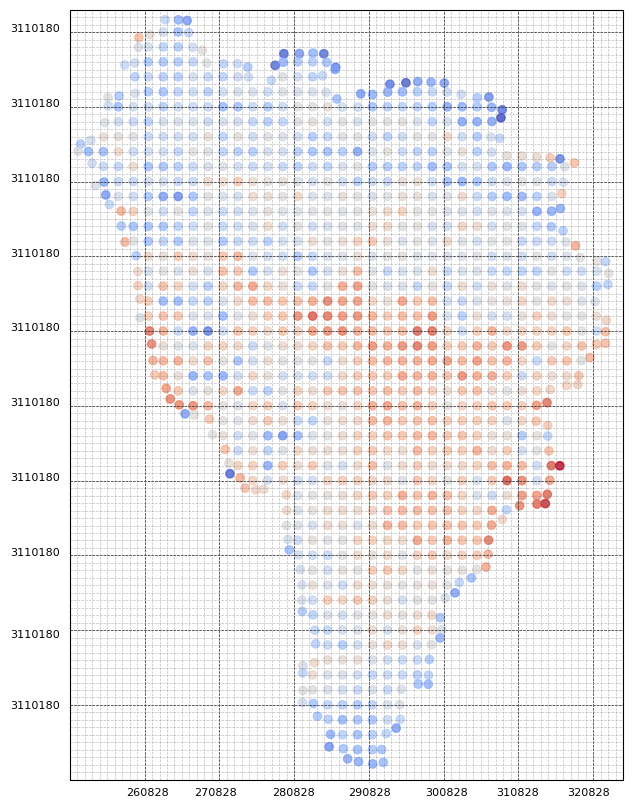

In [67]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import pyproj
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Define the projection to use
proj = pyproj.Proj('epsg:32645')

# Create a new figure and plot the map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.epsg(32645))
ax.set_extent([lower_x, higher_x, lower_y, higher_y], crs=ccrs.epsg(32645))
ax.coastlines(resolution='10m')
ax.scatter(cell_data_x, cell_data_y, c=cell_data_slope, cmap='coolwarm', alpha=0.8, transform=ccrs.epsg(32645))

# Create a new Gridliner object and add it to the map
gl = ax.gridlines(xlocs=range(lower_x, higher_x, 1000), ylocs=range(lower_y, higher_y, 1000), crs=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

x_grid = np.arange(lower_x, higher_x, 10)
y_grid = np.arange(lower_y, higher_y, 10)
# Manually add text labels to the gridlines

ax.text(lower_x + 7500 * 1, 3098000, str(lower_x+10000), transform=ccrs.epsg(32645), fontsize=8)
ax.vlines(lower_x + 10000 * 1, lower_y, higher_y, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(lower_x + 8300 * 2, 3098000, str(lower_x+10000*2), transform=ccrs.epsg(32645), fontsize=8)
ax.vlines(lower_x + 10000 * 2, lower_y, higher_y, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(lower_x + 9000 * 3, 3098000, str(lower_x+10000 * 3), transform=ccrs.epsg(32645), fontsize=8)
ax.vlines(lower_x + 10000 * 3, lower_y, higher_y, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(lower_x + 9300 * 4, 3098000, str(lower_x+10000*4), transform=ccrs.epsg(32645), fontsize=8)
ax.vlines(lower_x + 10000 * 4, lower_y, higher_y, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(lower_x + 9500 * 5, 3098000, str(lower_x+10000*5), transform=ccrs.epsg(32645), fontsize=8)
ax.vlines(lower_x + 10000 * 5, lower_y, higher_y, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(lower_x + 9500 * 6, 3098000, str(lower_x+10000*6), transform=ccrs.epsg(32645), fontsize=8)
ax.vlines(lower_x + 10000 * 6, lower_y, higher_y, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(lower_x + 9500 * 7, 3098000, str(lower_x+10000*7), transform=ccrs.epsg(32645), fontsize=8)
ax.vlines(lower_x + 10000 * 7, lower_y, higher_y, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 9500 * 1, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*1, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 9500 * 2, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*2, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 10000 * 3, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*3, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 10000 * 4, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*4, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 10000 * 5, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*5, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 10000 * 6, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*6, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 10000 * 7, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*7, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 10000 * 8, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*8, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 10000 * 9, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*9, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

ax.text(242828, lower_y + 10000 * 10, str(lower_y+10000*1), transform=ccrs.epsg(32645), fontsize=8)
ax.hlines(3100180 + 10000*10, lower_x,higher_x, transform=ccrs.epsg(32645), linestyle='--', linewidth=0.5, color='black')

# Label the y axis as y UTM and the x axis as x UTM
ax.set_ylabel('y UTM')
# Show the map

plt.savefig('figures/regular_grid.png', dpi=300, bbox_inches='tight')

plt.show()


In [68]:
viewer_h5py = tinviewer.TinSimpleViewerH5PY()

911
911
<HDF5 dataset "land_covers": shape (14,), type "|V116">


<Figure size 1000x2000 with 0 Axes>

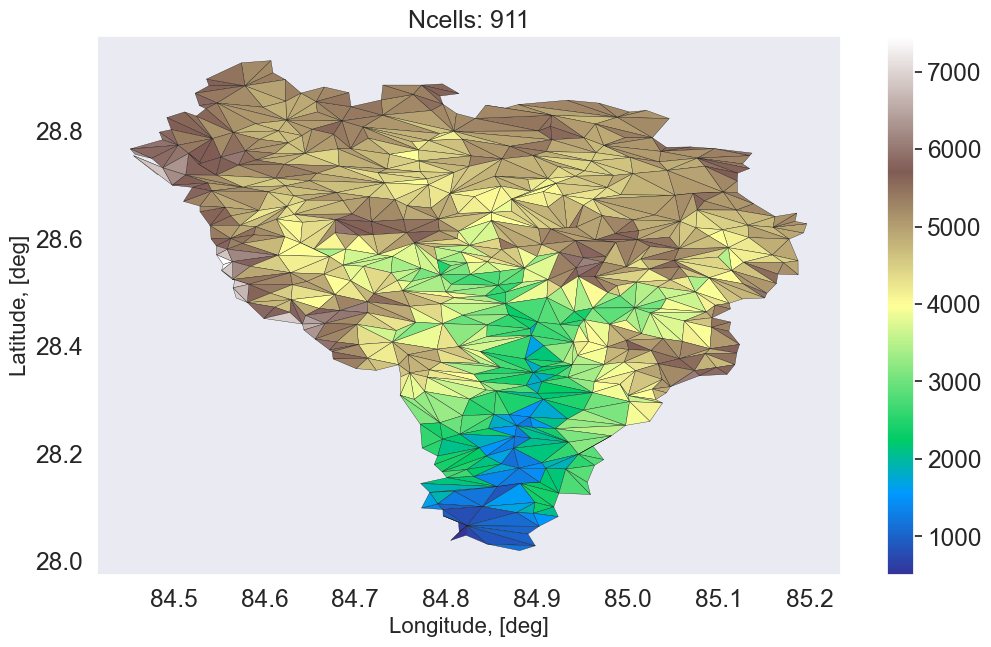

In [85]:
plt.figure(figsize=(10,20))
viewer_h5py.view_tins_terrain("tin_tools/tin_archive/", "narayani-cid-10-small","figs")

1071
1071
<HDF5 dataset "land_covers": shape (14,), type "|V116">


<Figure size 1000x2000 with 0 Axes>

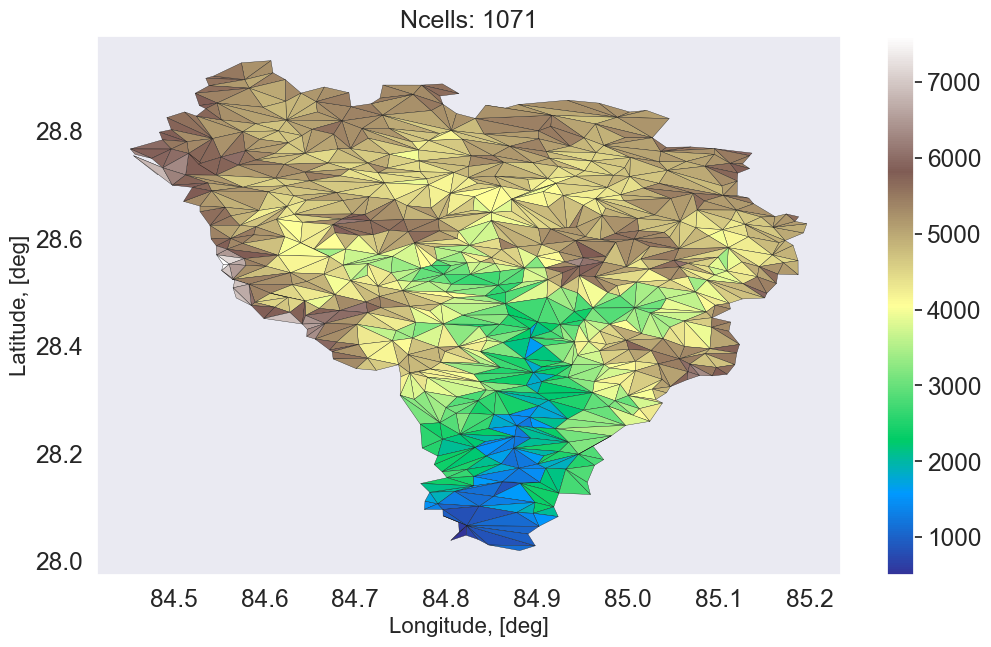

In [86]:
plt.figure(figsize=(10,20))
viewer_h5py.view_tins_terrain("tin_tools/tin_archive/", "narayani-cid-10-average","figs")

1382
1382
<HDF5 dataset "land_covers": shape (14,), type "|V116">


<Figure size 1000x2000 with 0 Axes>

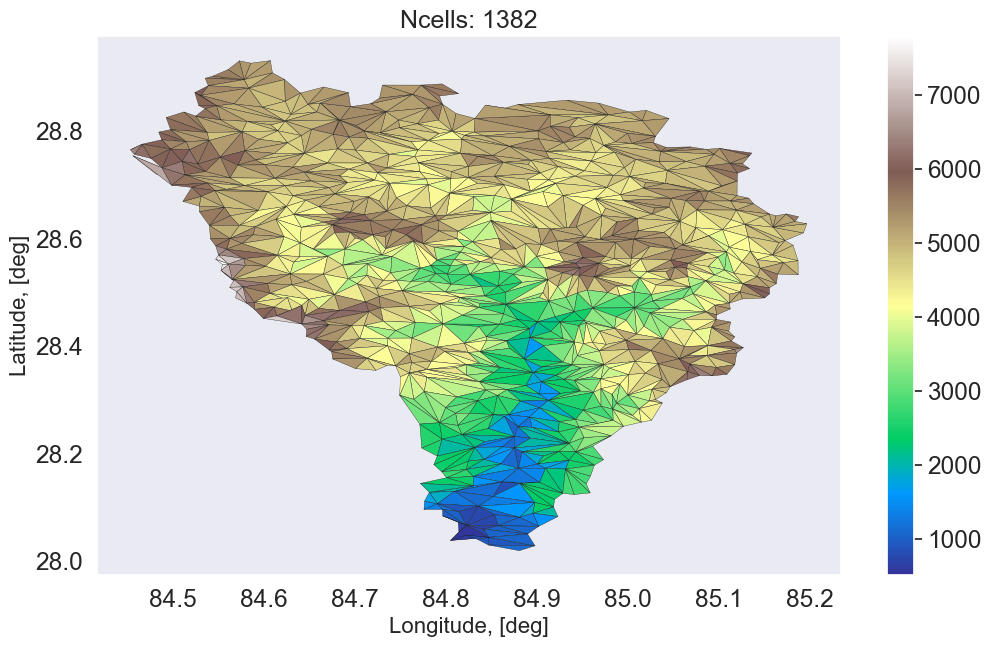

In [87]:
plt.figure(figsize=(10,20))
viewer_h5py.view_tins_terrain("tin_tools/tin_archive/", "narayani-cid-10-bigger","figs")

4681
4681
<HDF5 dataset "land_covers": shape (14,), type "|V116">


<Figure size 1000x2000 with 0 Axes>

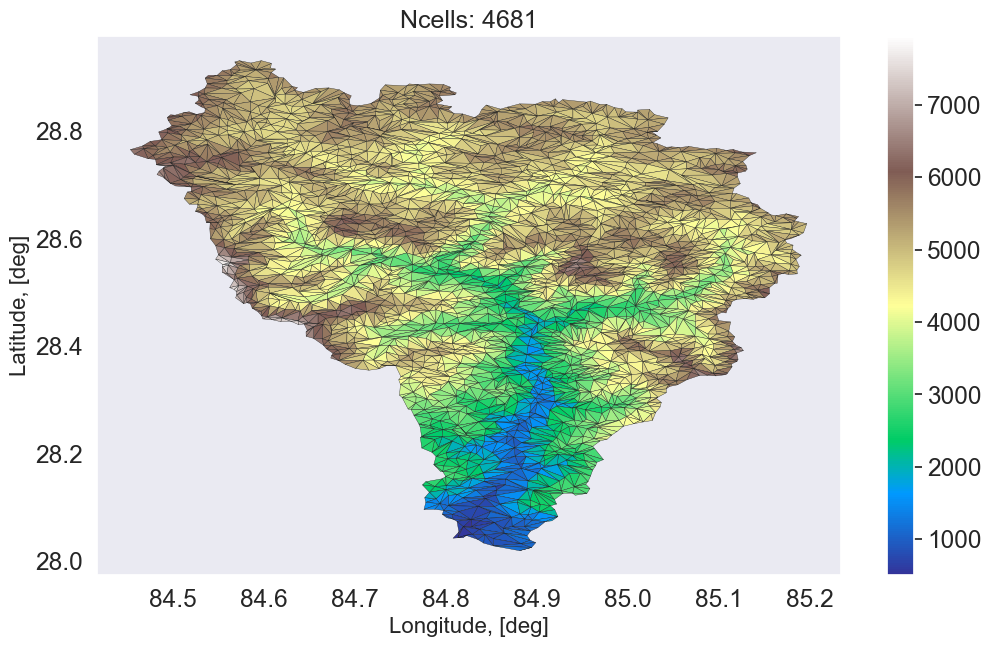

In [88]:
plt.figure(figsize=(10,20))
viewer_h5py.view_tins_terrain("tin_tools/tin_archive/", "narayani-cid-10-largest","figs")